In [1]:
# HIDDEN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# HIDDEN
def df_interact(df, nrows=7, ncols=7):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]

    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols)
               if len(df.columns) > ncols else fixed(0))
    
    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

In [66]:
at = (pd.read_csv('attendance_private.csv',
                  names=['time', 'email', 'name', 'pid', 'sec', 'num'],
                  skiprows=1)
      .assign(pid=lambda at: at['pid'].str.upper())
      .assign(time=lambda at: pd.to_datetime(at['time']))
      .assign(week=lambda at: at['time'].dt.week - 2)
     )
at

,time,email,name,pid,sec,num,week
0,2020-01-13 14:30:12-08:00,tyukelso@ucsd.edu,Taly Yukelson,A13341358,Mon 2pm,16,1
1,2020-01-13 14:30:15-08:00,adgaur@ucsd.edu,Aditi Gaur,A13675621,Mon 2pm,17,1
2,2020-01-13 14:30:22-08:00,nsamadha@ucsd.edu,Nevan Samadhana,A13837722,Mon 2pm,22,1
...,...,...,...,...,...,...,...
1202,2020-02-24 15:42:05-08:00,imnemato@ucsd.edu,Iman Nematollahi,A14943837,Mon 3pm,7,7
1203,2020-02-24 15:42:06-08:00,jiz613@ucsd.edu,Jiawei Zheng,A14895383,Mon 3pm,4,7
1204,2020-02-24 15:42:17-08:00,zneese@ucsd.edu,Zachary E Neese,A14840248,Mon 3pm,2,7


In [76]:
students = (pd.pivot_table(at.assign(at=1), values='at', index='pid', columns='week')
 .fillna(0)
 .astype(int)
)
students

week,1,2,3,4,5,6,7
pid,,,,,,,
2108,0,0,0,0,1,0,0
A10954128,1,1,1,1,1,0,0
A11403886,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...
A92112108,0,1,0,1,0,1,0
A92141798,1,0,0,0,0,0,0
U08623812,1,0,1,1,1,0,0


In [30]:
(at.groupby('week')
 .size()
 .rename('checkins')
 .to_frame()
)

,checkins
week,
1,255
2,191
3,175
4,188
5,192
6,179
7,25


/Users/sam/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:407: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  s = level_values.to_series()
/Users/sam/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:415: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  dindex = axis_index.to_series()


<Figure size 720x720 with 0 Axes>

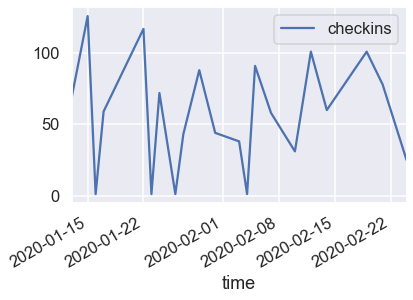

In [61]:
plt.figure(figsize=(10, 10))
(at.set_index('time')
 .resample('1D')
 .size()
 .rename('checkins')
 .to_frame()
 .query('checkins > 0')
 .plot.line()
)

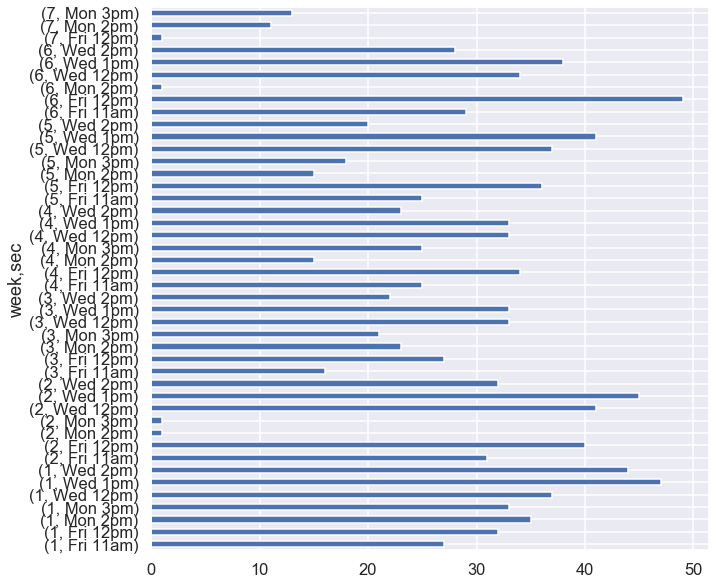

In [37]:
plt.figure(figsize=(10, 10))
(at.groupby(['week', 'sec'])
 .size()
 .plot.barh()
)